In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

$$
    \vec{x}_\mathrm{pair} = \vec{x}^\mathrm{\,triv} \oplus \left\{\bigoplus_l \vec{x}_l^\mathrm{\,ohe} \right\} \oplus \left\{\bigoplus_{l < l'} \vec{x}_l^\mathrm{\,ohe}  \otimes \vec{x}_{l'}^\mathrm{\,ohe}  \right\},
$$

$$
    T_\mathrm{pair} = T^\mathrm{\,triv} \oplus \left\{\bigoplus_l T^\mathrm{\,ohe} \right\} \oplus \left\{\bigoplus_{l < l'} T^\mathrm{\,ohe}  \otimes T^\mathrm{\,ohe}  \right\},
$$

In [92]:
x_triv = np.array([1])
x_ohe_A = np.array([1, 0, 0, 0])
x_ohe_C = np.array([0, 1, 0, 0])
x_ohe_G = np.array([0, 0, 1, 0])
x_ohe_T = np.array([0, 0, 0, 1])

char_to_ohe_dict = {
    'A':x_ohe_A,
    'C':x_ohe_C,
    'G':x_ohe_G,
    'T':x_ohe_T
}

seq = 'ACGT'
L = len(seq)

x_components = []

# Add in trivial component
x_components.append(x_triv)

# Add in single-position components
for i in range(L):
    c = seq[i]
    x_l = char_to_ohe_dict[c]
    x_components.append(x_l)

# Add in two-position components
for i1 in range(L-1):
    c1 = seq[i1]
    x_l1 = char_to_ohe_dict[c1]
    for i2 in range(i1+1,L):
        c2 = seq[i2]
        x_l2 = char_to_ohe_dict[c2]
        x_components.append(np.kron(x_l1,x_l2))

# Create x
x = np.concatenate(x_components)
print(x.shape)
x

(113,)


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [93]:
# Trivial matrix
T_triv = sp.csr_array([[1]])

# ohe_to_block for single position
T_ohe = sp.csr_array([
    [1, 1, 1, 1],
    [1, 0, 0, -1],
    [0, 1, 0, -1],
    [0, 0, 1, -1]
])

# Create list of diagonal matrices for pairwise model
diag_mats = [T_triv] + int(L)*[T_ohe] + int(L*(L-1)/2)*[sp.kron(T_ohe, T_ohe)]

# Compute matrix
T = sp.block_diag(diag_mats, format='csr')
print(T.shape)
T

(113, 113)


<113x113 sparse matrix of type '<class 'numpy.int64'>'
	with 1001 stored elements in Compressed Sparse Row format>

In [94]:
T@x

array([ 1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1, -1, -1, -1,
        1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
       -1, -1,  1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1, -1, -1, -1,
        0,  0,  0,  0,  1, -1, -1, -1,  0,  0,  0,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  1, -1, -1, -1])

<113x113 sparse matrix of type '<class 'numpy.int64'>'
	with 1001 stored elements in Compressed Sparse Row format>

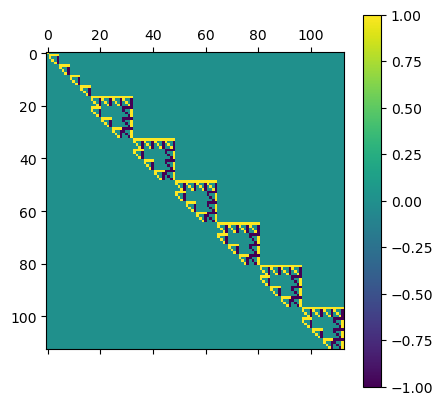

In [95]:
if L <= 20:
    plt.matshow(T.todense())
    plt.colorbar()
T

In [96]:
def my_expand(x):
    """
    Expands a list of lists. Simulates product expansion
    """
    if len(x) >= 1:
        a = x[0]
        b = x[1:]
        b_exp = my_expand(b)
        c = [[y]+z for y in a for z in b_exp]        
        return c
    else:
        return [x]

my_expand([['0', '1', '3'], ['4','5'], ['6']])

[['0', '4', '6'],
 ['0', '5', '6'],
 ['1', '4', '6'],
 ['1', '5', '6'],
 ['3', '4', '6'],
 ['3', '5', '6']]

In [97]:
# Want to expand a list of lists
s = '.+1+2+1x2+1x2x3'
a = s.split('+')
a

b = [z.split('x') for z in a]

for i in range(len(b)):
    for j in range(len(b[i])):
        z = b[i][j]
        if z!='.':
            b[i][j]=['.',z]
b

[['.'],
 [['.', '1']],
 [['.', '2']],
 [['.', '1'], ['.', '2']],
 [['.', '1'], ['.', '2'], ['.', '3']]]

In [98]:
c = []
for i, b_el in enumerate(b):
    if isinstance(b_el, str):
        c.append([b_el])
    elif isinstance(b_el, list) and len(b_el)>=1:
        c.extend(my_expand(b_el))
c

[['.'],
 ['.'],
 ['1'],
 ['.'],
 ['2'],
 ['.', '.'],
 ['.', '2'],
 ['1', '.'],
 ['1', '2'],
 ['.', '.', '.'],
 ['.', '.', '3'],
 ['.', '2', '.'],
 ['.', '2', '3'],
 ['1', '.', '.'],
 ['1', '.', '3'],
 ['1', '2', '.'],
 ['1', '2', '3']]

In [99]:
d = []
for x in c:
    y = [z for z in x if z!='.']
    if len(y)==0:
        y = ['.']
    d.append('x'.join(y))
'+'.join(d)

'.+.+1+.+2+.+2+1+1x2+.+3+2+2x3+1+1x3+1x2+1x2x3'

In [117]:
def ohe_to_sim_spec_str(ohe_spec_str):
    a = ohe_spec_str.split('+')
    b = [z.split('x') for z in a]
    for i in range(len(b)):
        for j in range(len(b[i])):
            z = b[i][j]
            if z!='.':
                b[i][j]=['.',z]
    
    # Recursive expansion
    c = []
    for i, b_el in enumerate(b):
        if isinstance(b_el, str):
            c.append([b_el])
        elif isinstance(b_el, list) and len(b_el)>=1:
            c.extend(my_expand(b_el))

    # Remove redundant factors of '.'
    sim_spec_list = []
    for x in c:
        y = [z for z in x if z!='.']
        if len(y)==0:
            y = ['.']
        sim_spec_list.append(y)
    sim_spec_str = '+'.join(['x'.join(z) for z in sim_spec_list])
    return sim_spec_str

# Test expansion
expand_ohe_spec_str('.+1+2+3+1x2+1x3+2x3')

'.+.+1+.+2+.+3+.+2+1+1x2+.+3+1+1x3+.+3+2+2x3'

In [141]:
# Compute starting positions for each entry in the sim_spec_str
def spec_str_to_list(s):
    return [x.split('x') for x in s.split('+')]

spec_list = spec_str_to_list('.+.+1+.+2+.+3+.+2+1+1x2+.+3+1+1x3+.+3+2+2x3')
spec_list

def get_shifts_and_sizes(spec_list, encoding_size):
    """ inputs spec list. outputs a list of (spec, size, shift) """
    specs = []
    shift = 0
    for x in spec_list:
        if len(x)==1 and x[0]=='.':
            size = 1
        else:
            size = encoding_size**len(x)
        specs.append(('x'.join(x),size,shift))
        shift += size
    M = shift
    return specs, M

specs, M = get_shifts_and_sizes(spec_list, encoding_size=3)
print(M)
print(specs)

61
[('.', 1, 0), ('.', 1, 1), ('1', 3, 2), ('.', 1, 5), ('2', 3, 6), ('.', 1, 9), ('3', 3, 10), ('.', 1, 13), ('2', 3, 14), ('1', 3, 17), ('1x2', 9, 20), ('.', 1, 29), ('3', 3, 30), ('1', 3, 33), ('1x3', 9, 36), ('.', 1, 45), ('3', 3, 46), ('2', 3, 49), ('2x3', 9, 52)]


In [223]:
# Test on ohe spec string
ohe_spec_str = '.+1+2+3+4+1x2+2x3+3x4'
print(f'ohe_spec_str: "{ohe_spec_str}"')
spec_list = spec_str_to_list(ohe_spec_str)
specs, M = get_shifts_and_sizes(spec_list, encoding_size=4)
print('M:', M)
print('specs:', specs)

ohe_spec_str: ".+1+2+3+4+1x2+2x3+3x4"
M: 65
specs: [('.', 1, 0), ('1', 4, 1), ('2', 4, 5), ('3', 4, 9), ('4', 4, 13), ('1x2', 16, 17), ('2x3', 16, 33), ('3x4', 16, 49)]


In [224]:
# Convert ohe spec string to sim spec string and test
sim_spec_str = ohe_to_sim_spec_str(ohe_spec_str)
print(f'sim_spec_str: "{sim_spec_str}"')
spec_list = spec_str_to_list(sim_spec_str)
specs, M = get_shifts_and_sizes(spec_list, encoding_size=3)
print('M:', M)
print('specs:', specs)

sim_spec_str: ".+.+1+.+2+.+3+.+4+.+2+1+1x2+.+3+2+2x3+.+4+3+3x4"
M: 65
specs: [('.', 1, 0), ('.', 1, 1), ('1', 3, 2), ('.', 1, 5), ('2', 3, 6), ('.', 1, 9), ('3', 3, 10), ('.', 1, 13), ('4', 3, 14), ('.', 1, 17), ('2', 3, 18), ('1', 3, 21), ('1x2', 9, 24), ('.', 1, 33), ('3', 3, 34), ('2', 3, 37), ('2x3', 9, 40), ('.', 1, 49), ('4', 3, 50), ('3', 3, 53), ('3x4', 9, 56)]


In [225]:
# Build zeroing-out matrix
component_dict = {}
diag_vecs = []
inv_diag_vecs = []
diag_offsets = []

# Add in main diagonal
diag_vecs.append(M*[1])
inv_diag_vecs.append(M*[1])
diag_offsets.append(0)
for spec in specs:
    key = spec[0]
    m = spec[1]
    offset = spec[2]
    if key not in component_dict:
        component_dict[key] = (m,offset)
    else:
        m1, offset1 = component_dict[key]
        try:
            assert m1==m
        except:
            print('m1:', m1)
            print('m:', m)
            pdb.set_trace()
        diag_vec = offset1*[0]+m*[-1]+(M-(offset+m))*[0]
        inv_diag_vec = offset1*[0]+m*[1]+(M-(offset+m))*[0]
        diag_offset = -(offset-offset1)
        diag_vecs.append(diag_vec)
        inv_diag_vecs.append(inv_diag_vec)
        diag_offsets.append(diag_offset)

print('diag_vecs:', diag_vecs)
print('diag_offsets:', diag_offsets)

diag_vecs: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [243]:
# Copy dictionary, adding a counter
component_dict2 = {}
counter = 1
for key, value in component_dict.items():
    m, offset = value
    r = .1+.9*counter/len(component_dict)
    component_dict2[key] = (m, offset, r)
    counter+=1
    
x_test = np.zeros(M)
for spec in specs:
    key, m, offset = spec
    _, _, r = component_dict2[key]
    x_test[offset:offset+m]=r

len(x_test)

65

.+.+1+.+2+.+3+.+4+.+2+1+1x2+.+3+2+2x3+.+4+3+3x4


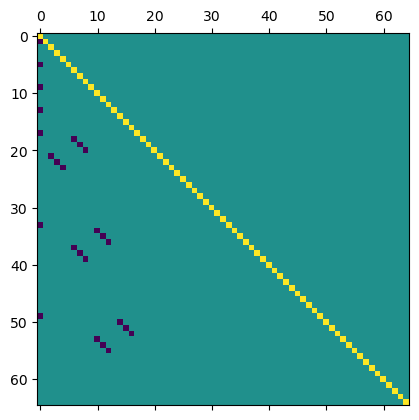

In [244]:
A = sp.diags(diag_vecs, diag_offsets)
plt.matshow(A.todense(), vmin=-1, vmax=1)
print(sim_spec_str)

.+.+1+.+2+.+3+.+4+.+2+1+1x2+.+3+2+2x3+.+4+3+3x4


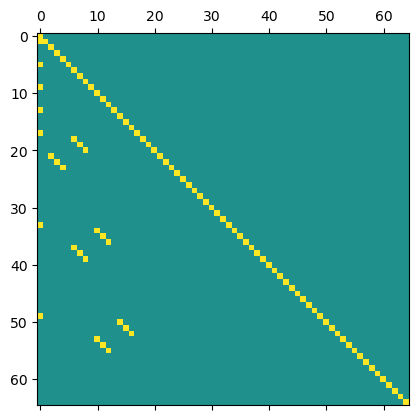

In [245]:
A_inv = sp.diags(inv_diag_vecs, diag_offsets)
plt.matshow(A_inv.todense(), vmin=-1, vmax=1)
print(sim_spec_str)

.+.+1+.+2+.+3+.+4+.+2+1+1x2+.+3+2+2x3+.+4+3+3x4


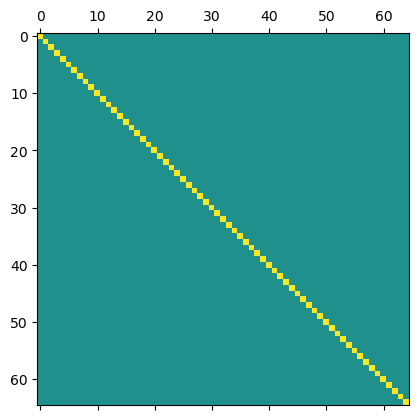

In [246]:
I = A@A_inv
plt.matshow(I.todense(), vmin=-1, vmax=1)
print(sim_spec_str)

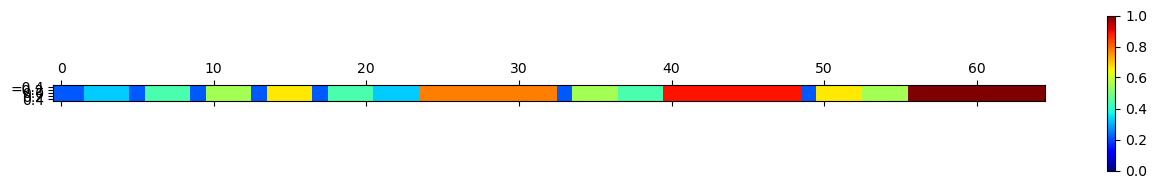

In [247]:
plt.matshow(x_test.reshape([M,1]).T, vmin=0, vmax=1, cmap='jet')
plt.colorbar()

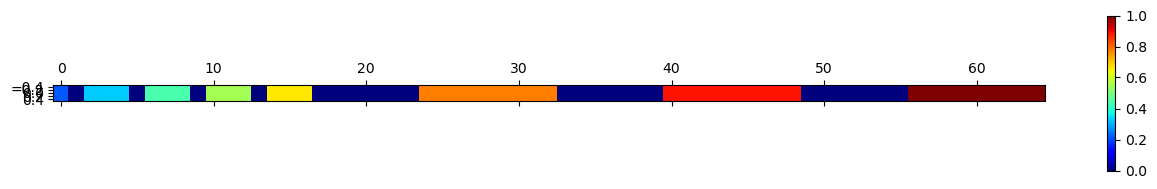

In [248]:
x_dist = A*x_test
plt.matshow(x_dist.reshape([M,1]).T, vmin=0, vmax=1, cmap='jet')
plt.colorbar()

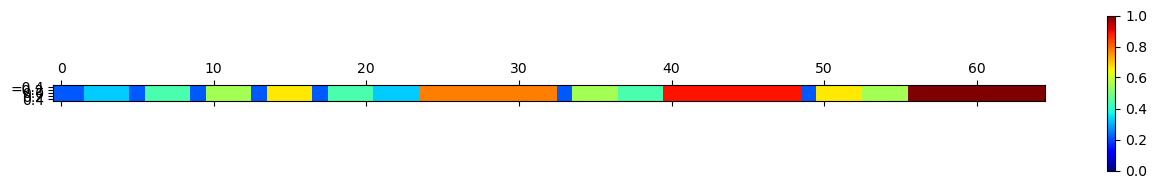

In [249]:
x_test2 = A_inv@x_dist
plt.matshow(x_test2.reshape([M,1]).T, vmin=0, vmax=1, cmap='jet')
plt.colorbar()

In [313]:
###
### Start again from here
###

L = 4

def L_to_spec_str_constant():
    return '.'
print(f'L_to_spec_str_constant(): "{L_to_spec_str_constant()}"')

def L_to_spec_str_additive(L):
    parts = []
    parts.append(L_to_spec_str_constant())
    for i in range(L):
        parts.append(f'{i:d}')
    return '+'.join(parts)
print(f'L_to_spec_str_additive(L={L}): "{L_to_spec_str_additive(L=L)}"')

def L_to_spec_str_neighbor(L):
    parts = []
    parts.append(L_to_spec_str_additive(L))
    for i in range(L-1):
        parts.append(f'{i:d}x{i+1:d}')
    return '+'.join(parts)
print(f'L_to_spec_str_neighbor(L={L}): "{L_to_spec_str_neighbor(L=L)}"')

def L_to_spec_str_pairwise(L):
    parts = []
    parts.append(L_to_spec_str_additive(L))
    for i in range(L-1):
        for j in range(i+1,L):
            parts.append(f'{i:d}x{j:d}')
    return '+'.join(parts)
print(f'L_to_spec_str_pairwise(L={L}): "{L_to_spec_str_pairwise(L=L)}"')

def L_to_spec_str_3adjacent(L):
    parts = []
    parts.append(L_to_spec_str_neighbor(L))
    for i in range(L-2):
        parts.append(f'{i:d}x{i+1:d}x{i+2}')
    return '+'.join(parts)
print(f'L_to_spec_str_3adjacent(L={L}): "{L_to_spec_str_3adjacent(L=L)}"')

def L_to_spec_str_3order(L):
    parts = []
    parts.append(L_to_spec_str_pairwise(L))
    for i in range(L-2):
        for j in range(i+1,L-1):
            for k in range(j+1,L):
                parts.append(f'{i:d}x{j:d}x{k:d}')
    return '+'.join(parts)
print(f'L_to_spec_str_3order(L={L}): "{L_to_spec_str_3order(L=L)}"')


L_to_spec_str_constant(): "."
L_to_spec_str_additive(L=4): ".+0+1+2+3"
L_to_spec_str_neighbor(L=4): ".+0+1+2+3+0x1+1x2+2x3"
L_to_spec_str_pairwise(L=4): ".+0+1+2+3+0x1+0x2+0x3+1x2+1x3+2x3"
L_to_spec_str_3adjacent(L=4): ".+0+1+2+3+0x1+1x2+2x3+0x1x2+1x2x3"
L_to_spec_str_3order(L=4): ".+0+1+2+3+0x1+0x2+0x3+1x2+1x3+2x3+0x1x2+0x1x3+0x2x3+1x2x3"


In [312]:
# Create function to make ohe encoding from ohe_spec_string
def seq_to_x(seq, ohe_spec_str):
    '''Given a DNA seq and an ohe_spec_str, returns a one-hot encoding x'''
    L = len(seq)
    x_components = []
    
    ohe_spec_str_parts = ohe_spec_str.split('+')
    for part in ohe_spec_str_parts:
        
        # Add in trivial component
        if part=='.':
            x_components.append(x_triv)
        else:
            positions = [int(p) for p in part.split('x')]
            assert len(positions) > 0
            x_irr = x_triv
            while len(positions) > 0:
                pos = positions.pop()
                c = seq[pos]
                x_l = char_to_ohe_dict[c]
                x_irr = np.kron(x_irr, x_l)
            x_components.append(x_irr)
    
    # Create x
    x = np.concatenate(x_components)
    return x

# Test seq_to_x_neighbor
seq = 'ACGTAA'
L = len(seq)
ohe_spec_str = L_to_spec_str_3adj(L)
x = seq_to_x(seq, ohe_spec_str)
print('M:', len(x))
print('ohe_spec_str:', ohe_spec_str)
print('x: ', x)

M: 361
ohe_spec_str: .+0+1+2+3+4+5+0x1+1x2+2x3+3x4+4x5+0x1x2+1x2x3+2x3x4+3x4x5
x:  [1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<113x113 sparse matrix of type '<class 'numpy.int64'>'
	with 1601 stored elements in Compressed Sparse Row format>

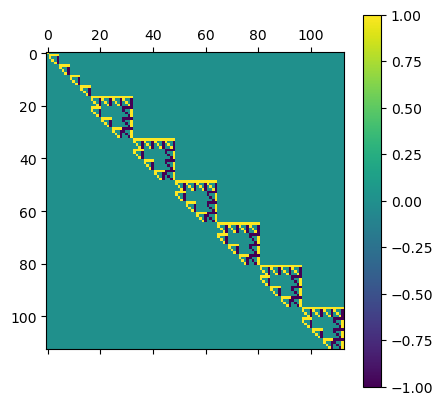

In [307]:
def ohe_spec_str_to_T(ohe_spec_str):

    # Trivial matrix
    T_triv = sp.csr_array([[1]])

    # ohe_to_block for single position
    T_ohe = sp.csr_array([
        [1, 1, 1, 1],
        [1, 0, 0, -1],
        [0, 1, 0, -1],
        [0, 0, 1, -1]
    ])

    diag_mats = []
    
    parts = ohe_spec_str.split('+')
    for part in parts:
        if part == '.':
            T_part = T_triv
        else:
            bits = part.split('x')
            T_part = T_triv
            for bit in part.split('x'):
                T_part = sp.kron(T_part, T_ohe)
        diag_mats.append(T_part)
    T = sp.block_diag(diag_mats, format='csr')
    return T

# Test ohe_spec_str_to_T
T = ohe_spec_str_to_T(ohe_spec_str)
plt.matshow(T.todense())
plt.colorbar()
T

ValueError: dimension mismatch

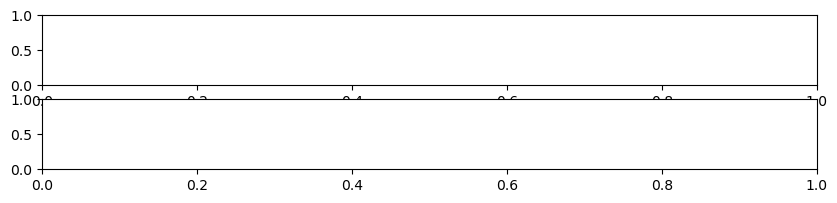

In [308]:
fig, axs = plt.subplots(2,1,figsize=[10,2])

x_trans = A@T@x
x_dist = A@x_test

ax = axs[0]
ax.matshow(x_trans.reshape([M,1]).T, vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
#ax.colorbar()

ax = axs[1]
ax.matshow(x_dist.reshape([M,1]).T, vmin=-1, vmax=1, cmap='jet')
ax.set_yticks([])
#ax.set_colorbar()